In [117]:
import icarogw, os, bilby, corner, pickle, h5py, matplotlib.pyplot as plt, numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis
from icarogw.utils.quick_init import initialize_prior_dict

injections = pickle.load(open("/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"

list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(runs=['O1','O2'],type=['BBH', 'SPECIAL'],snr_cut=11)
for event in list(list_evO1O2.keys()):
    print(event)
    filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"        
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples
    
list_evO3a = icarogw.utils.quick_init.initialize_events_dict(runs=['O3a'],type=['BBH', 'SPECIAL'],snr_cut=11)
for event in list(list_evO3a.keys()):
    if event!='GW190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples
    
list_evO3b = icarogw.utils.quick_init.initialize_events_dict(runs=['O3b'],type=['BBH', 'SPECIAL'],snr_cut=11)
for event in list(list_evO3b.keys()):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"        
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples
    
print(f"Using {len(posterior_dict)} events.")

GW150914
Using Overall_posterior posterior with a total of 8350 samples
GW151226
Using Overall_posterior posterior with a total of 52252 samples
GW170104
Using Overall_posterior posterior with a total of 24972 samples
GW170608
Using Overall_posterior posterior with a total of 6448 samples
GW170809
Using Overall_posterior posterior with a total of 14802 samples
GW170814
Using Overall_posterior posterior with a total of 40000 samples
GW170818
Using Overall_posterior posterior with a total of 5862 samples
GW170823
Using Overall_posterior posterior with a total of 4278 samples
GW190408_181802
Using PublicationSamples posterior with a total of 37366 samples
GW190412
Using PublicationSamples posterior with a total of 23984 samples
GW190503_185404
Using PublicationSamples posterior with a total of 37669 samples
GW190512_180714
Using PublicationSamples posterior with a total of 37247 samples
GW190513_205428
Using PublicationSamples posterior with a total of 39072 samples
GW190517_055101
Using 

In [121]:
mass_model = 'BBH-broken-powerlaw'
cosmology_model = 'w0flatLCDM'
redshift_model = 'madau'
outdir = f'H0_GWTC-3_{mass_model}_{cosmology_model}_{redshift_model}_kappa-66/'
injections.update_cut(snr_cut=11,ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 11.000000 and IFAR 0.000000 yr


In [122]:
prior_dict = initialize_prior_dict(mass_model, cosmology_model, redshift_model, False)
# prior_dict['M'] = 5
# prior_dict['σc'] = 0.5
# prior_dict['Om0']=0.308
prior_dict["kappa"] = bilby.core.prior.Uniform(-6, 6, name='kappa')

11:53 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_BBH-broken-powerlaw_w0flatLCDM_madau_kappa-66/'
11:53 bilby INFO    : Search parameters:
11:53 bilby INFO    :   gamma = Uniform(minimum=0, maximum=12, name='gamma', latex_label='gamma', unit=None, boundary=None)
11:53 bilby INFO    :   kappa = Uniform(minimum=-6, maximum=6, name='kappa', latex_label='kappa', unit=None, boundary=None)
11:53 bilby INFO    :   zp = Uniform(minimum=0, maximum=4, name='zp', latex_label='zp', unit=None, boundary=None)
11:53 bilby INFO    :   R0 = Uniform(minimum=0, maximum=100, name='$R_0$', latex_label='$R_0$', unit=None, boundary=None)
11:53 bilby INFO    :   alpha_1 = Uniform(minimum=1.5, maximum=12, name='alpha_1', latex_label='alpha_1', unit=None, boundary=None)
11:53 bilby INFO    :   alpha_2 = Uniform(minimum=1.5, maximum=12, name='alpha_2', latex_label='alpha_2', unit=None, boundary=None)
11:53 bilby INFO    :   beta = Uniform(minimum=-4, maximum=12, name='beta', l

Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:161: RuntimeWarning: divide by zero encountered in log
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:159: RuntimeWarning: divide by zero encountered in log
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/cosmologies.py:228: RuntimeWarning: divide by zero encountered in log10
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/redshift.py:78: RuntimeWarning: divide by zero encountered in log
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_pri

0it [00:00, ?it/s]

11:53 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f8d4d6c28b0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
11:53 bilby INFO    : Checkpoint every check_point_delta_t = 600s
11:53 bilby INFO    : Using dynesty version 1.0.1
11:53 bilby INFO    : Using the bilby-implemented rwalk samp

14it [28:38, 19.20s/it, bound:0 nc: 56 ncall:9.9e+02 eff:1.4% logz=-5814.57+/-0.17 dlogz:5594.432>0.1]  

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


16it [28:46, 13.94s/it, bound:1 nc: 26 ncall:1.0e+03 eff:1.5% logz=-4243.31+/-0.17 dlogz:3521.750>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


75it [28:52,  1.22it/s, bound:5 nc: 21 ncall:2.3e+03 eff:3.3% logz=-1448.60+/-0.17 dlogz:421.857>0.1] 

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:159: RuntimeWarning: invalid value encountered in log
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/injections.py:166: RuntimeWarning: invalid value encountered in double_scalars
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/analyses/cosmo_pop_rate_marginalized.py:179: RuntimeWarning: divide by zero encountered in log
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icaro

82it [29:00,  1.13it/s, bound:5 nc: 21 ncall:2.5e+03 eff:3.3% logz=-1422.94+/-0.15 dlogz:392.858>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


110it [29:08,  1.69it/s, bound:7 nc: 21 ncall:3.0e+03 eff:3.6% logz=-1366.45+/-0.17 dlogz:344.433>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


141it [29:13,  2.46it/s, bound:9 nc: 21 ncall:3.7e+03 eff:3.8% logz=-1325.37+/-0.14 dlogz:294.332>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:159: RuntimeWarning: invalid value encountered in log
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/injections.py:166: RuntimeWarning: invalid value encountered in double_scalars
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/analyses/cosmo_pop_rate_marginalized.py:179: RuntimeWarning: divide by zero encountered in log
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:159: RuntimeWarning: invalid value encountered in log
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5

191it [29:22,  3.63it/s, bound:13 nc: 21 ncall:4.8e+03 eff:4.0% logz=-1290.61+/-0.14 dlogz:259.388>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


201it [29:30,  2.83it/s, bound:13 nc: 21 ncall:5.1e+03 eff:4.0% logz=-1283.91+/-0.15 dlogz:253.267>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


231it [29:37,  3.34it/s, bound:15 nc: 21 ncall:5.7e+03 eff:4.0% logz=-1255.11+/-0.15 dlogz:223.974>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


292it [29:46,  5.08it/s, bound:20 nc: 21 ncall:7.0e+03 eff:4.1% logz=-1210.56+/-0.14 dlogz:179.134>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


378it [30:09,  4.75it/s, bound:26 nc: 21 ncall:8.9e+03 eff:4.2% logz=-1168.41+/-0.14 dlogz:136.767>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


385it [30:15,  3.43it/s, bound:26 nc: 21 ncall:9.1e+03 eff:4.2% logz=-1165.87+/-0.15 dlogz:134.388>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


433it [30:23,  5.09it/s, bound:30 nc: 21 ncall:1.0e+04 eff:4.2% logz=-1147.93+/-0.14 dlogz:115.950>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


443it [30:32,  2.97it/s, bound:30 nc: 21 ncall:1.0e+04 eff:4.2% logz=-1145.76+/-0.14 dlogz:113.731>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


535it [30:48,  5.67it/s, bound:37 nc: 21 ncall:1.2e+04 eff:4.3% logz=-1124.47+/-0.13 dlogz:92.224>0.1] 

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


804it [31:57,  6.12it/s, bound:56 nc: 21 ncall:1.8e+04 eff:4.4% logz=-1087.12+/-0.14 dlogz:54.359>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


1072it [33:16,  2.85it/s, bound:75 nc: 21 ncall:2.5e+04 eff:4.4% logz=-1068.21+/-0.13 dlogz:34.763>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


1238it [33:52,  5.38it/s, bound:88 nc: 21 ncall:2.9e+04 eff:4.3% logz=-1060.70+/-0.13 dlogz:26.916>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


1672it [36:05,  4.31it/s, bound:124 nc: 21 ncall:4.0e+04 eff:4.2% logz=-1049.39+/-0.13 dlogz:19.217>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


2133it [38:34,  2.52it/s, bound:162 nc: 21 ncall:5.2e+04 eff:4.1% logz=-1044.19+/-0.13 dlogz:14.731>0.1]

12:32 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-broken-powerlaw_w0flatLCDM_madau_kappa-66//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2175it [38:44,  4.43it/s, bound:166 nc: 21 ncall:5.3e+04 eff:4.1% logz=-1043.86+/-0.14 dlogz:14.314>0.1]

/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: divide by zero encountered in true_divide


4051it [48:39,  2.57it/s, bound:324 nc: 21 ncall:1.0e+05 eff:3.9% logz=-1036.58+/-0.16 dlogz:4.376>0.1] 

12:42 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-broken-powerlaw_w0flatLCDM_madau_kappa-66//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5774it [58:47,  2.23it/s, bound:480 nc: 26 ncall:1.5e+05 eff:3.8% logz=-1035.16+/-0.17 dlogz:0.686>0.1]

12:52 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-broken-powerlaw_w0flatLCDM_madau_kappa-66//dynesty_resume.pickle
12:52 bilby INFO    : Writing 611 current samples to H0_GWTC-3_BBH-broken-powerlaw_w0flatLCDM_madau_kappa-66//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6928it [1:06:47,  1.68it/s, bound:598 nc: 37 ncall:1.9e+05 eff:3.6% logz=-1034.97+/-0.18 dlogz:0.102>0.1]

13:00 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-broken-powerlaw_w0flatLCDM_madau_kappa-66//dynesty_resume.pickle
13:00 bilby INFO    : Writing 2410 current samples to H0_GWTC-3_BBH-broken-powerlaw_w0flatLCDM_madau_kappa-66//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
13:00 bilby INFO    : Starting to close worker pool.
13:00 bilby INFO    : Finished closing worker pool.


6937it [1:06:53,  1.73it/s, bound:600 nc:  1 ncall:1.9e+05 eff:3.9% logz=-1034.92+/-0.19 dlogz:0.000>0.1]



13:00 bilby INFO    : Sampling time: 0:38:16.998858
13:00 bilby INFO    : Summary of results:
nsamples: 7437
ln_noise_evidence:    nan
ln_evidence: -1034.923 +/-  0.188
ln_bayes_factor:    nan +/-  0.188



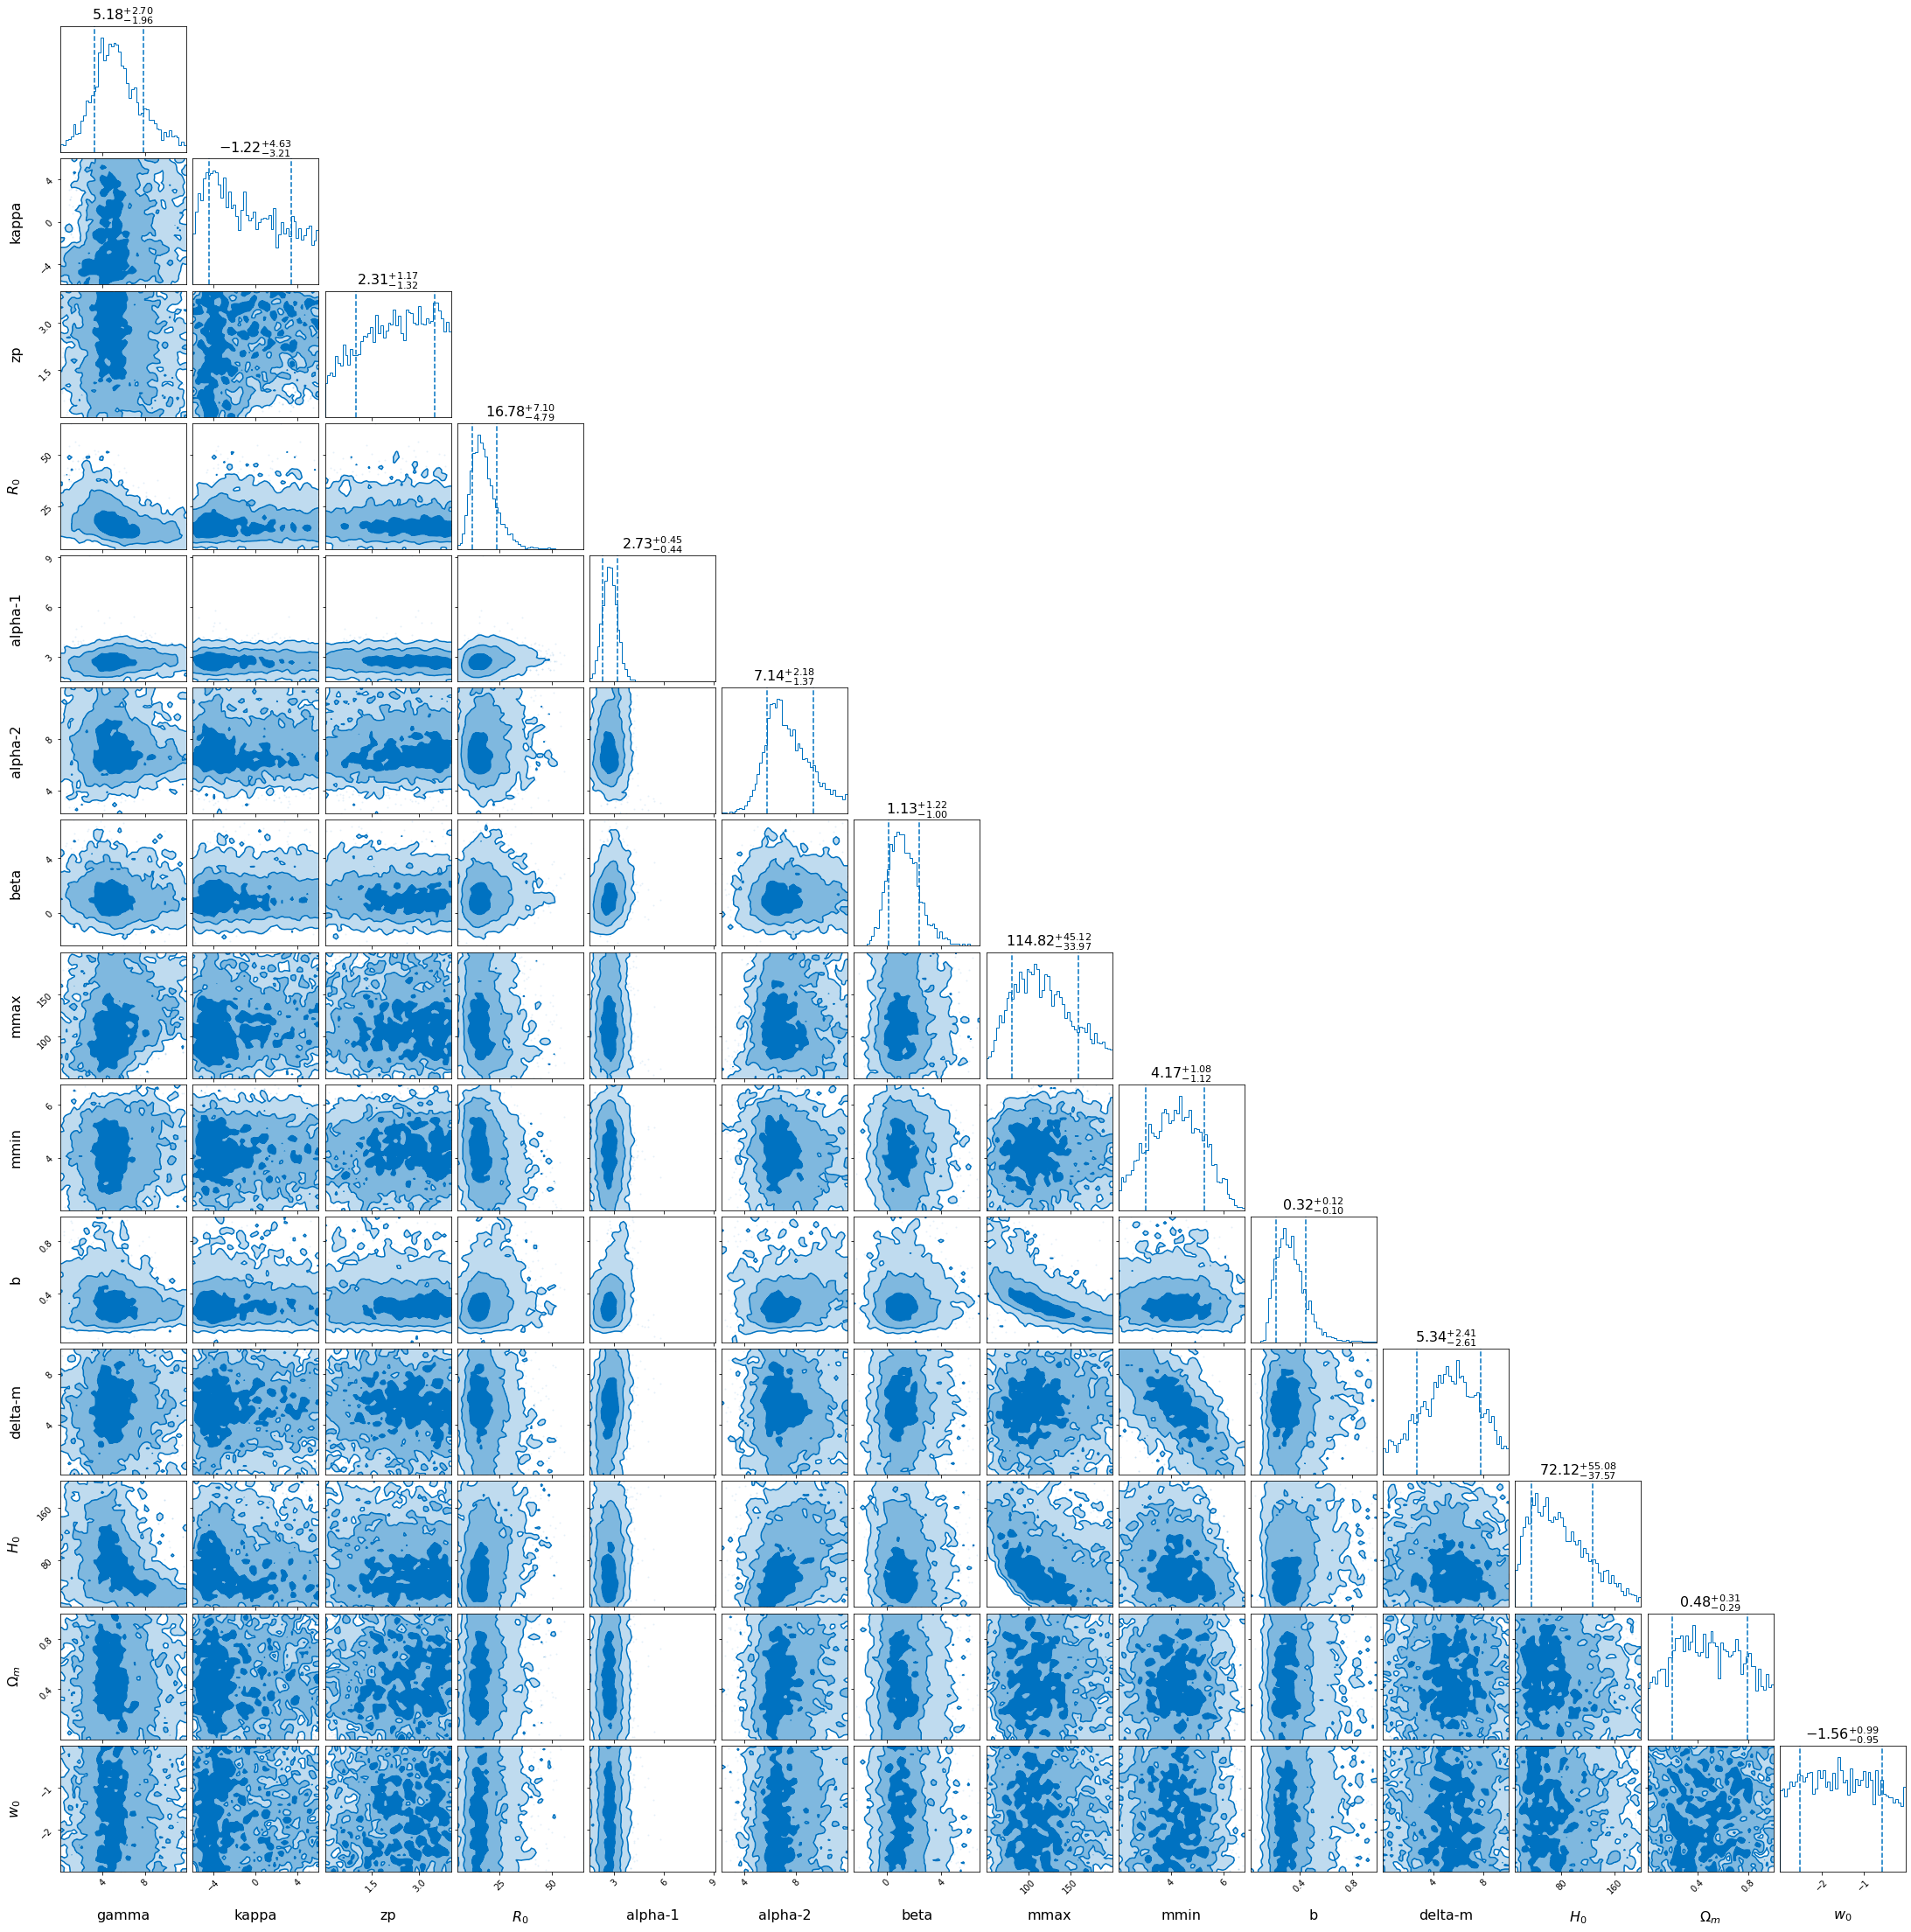

In [123]:
analysis = hierarchical_analysis(posterior_dict,injections,scale_free=False)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(mass_model, cosmology_model, redshift_model, prior_dict, 
                            parallel=2000, nlive=500, nact=2, walks=20, outdir=outdir, label='dynesty', npool=32)
result.plot_corner()

In [88]:
import json
f = open('/home/czc/projects/working/LIGO_posterior/Data distribution of Constraints on the cosmic expansion history from the GWTC-3/O3_icarogw_data_distro.json')
ligo_result0 = json.load(f)['SNR_11_BBH-broken-powerlaw_w0flatLCDM']

our_result = np.loadtxt("H0_GWTC-3_BBH-broken-powerlaw_w0flatLCDM_madau_1/dynesty_samples.dat", skiprows=1)

In [72]:
print(ligo_result.keys())

dict_keys(['gamma', 'kappa', 'zp', 'R0', 'alpha_1', 'alpha_2', 'beta', 'mmax', 'mmin', 'b', 'delta_m', 'H0', 'Om0', 'w0'])


In [74]:
prior_dict

{'gamma': Uniform(minimum=0, maximum=12, name='gamma', latex_label='gamma', unit=None, boundary=None),
 'kappa': Uniform(minimum=0, maximum=6, name='kappa', latex_label='kappa', unit=None, boundary=None),
 'zp': Uniform(minimum=0, maximum=4, name='zp', latex_label='zp', unit=None, boundary=None),
 'R0': Uniform(minimum=0, maximum=100, name='$R_0$', latex_label='$R_0$', unit=None, boundary=None),
 'alpha_1': Uniform(minimum=1.5, maximum=12, name='alpha_1', latex_label='alpha_1', unit=None, boundary=None),
 'alpha_2': Uniform(minimum=1.5, maximum=12, name='alpha_2', latex_label='alpha_2', unit=None, boundary=None),
 'beta': Uniform(minimum=-4, maximum=12, name='beta', latex_label='beta', unit=None, boundary=None),
 'mmax': Uniform(minimum=50, maximum=200, name='mmax', latex_label='mmax', unit=None, boundary=None),
 'mmin': Uniform(minimum=2, maximum=50, name='mmin', latex_label='mmin', unit=None, boundary=None),
 'b': Uniform(minimum=0, maximum=1, name='b', latex_label='b', unit=None, bo

In [90]:
len(ligo_result0)

14

In [92]:
ligo_result = np.zeros((len(ligo_result0["H0"]), len(ligo_result0)))

In [93]:
for i, key in enumerate(ligo_result0.keys()):
    ligo_result[:, i] = ligo_result0[key]


In [102]:
import matplotlib.lines as mlines

In [113]:
labels=[r"$\gamma$", r"$\kappa$", r"$z_p$", r"$R_0$", r"$\alpha_1$", r"$\alpha_2$", r"$\beta$", r"$m_{max}$", r"$m_{min}$", "b", r"$\delta_m$", r"$H_0$", r"$\Omega_m$", r"$w$"]

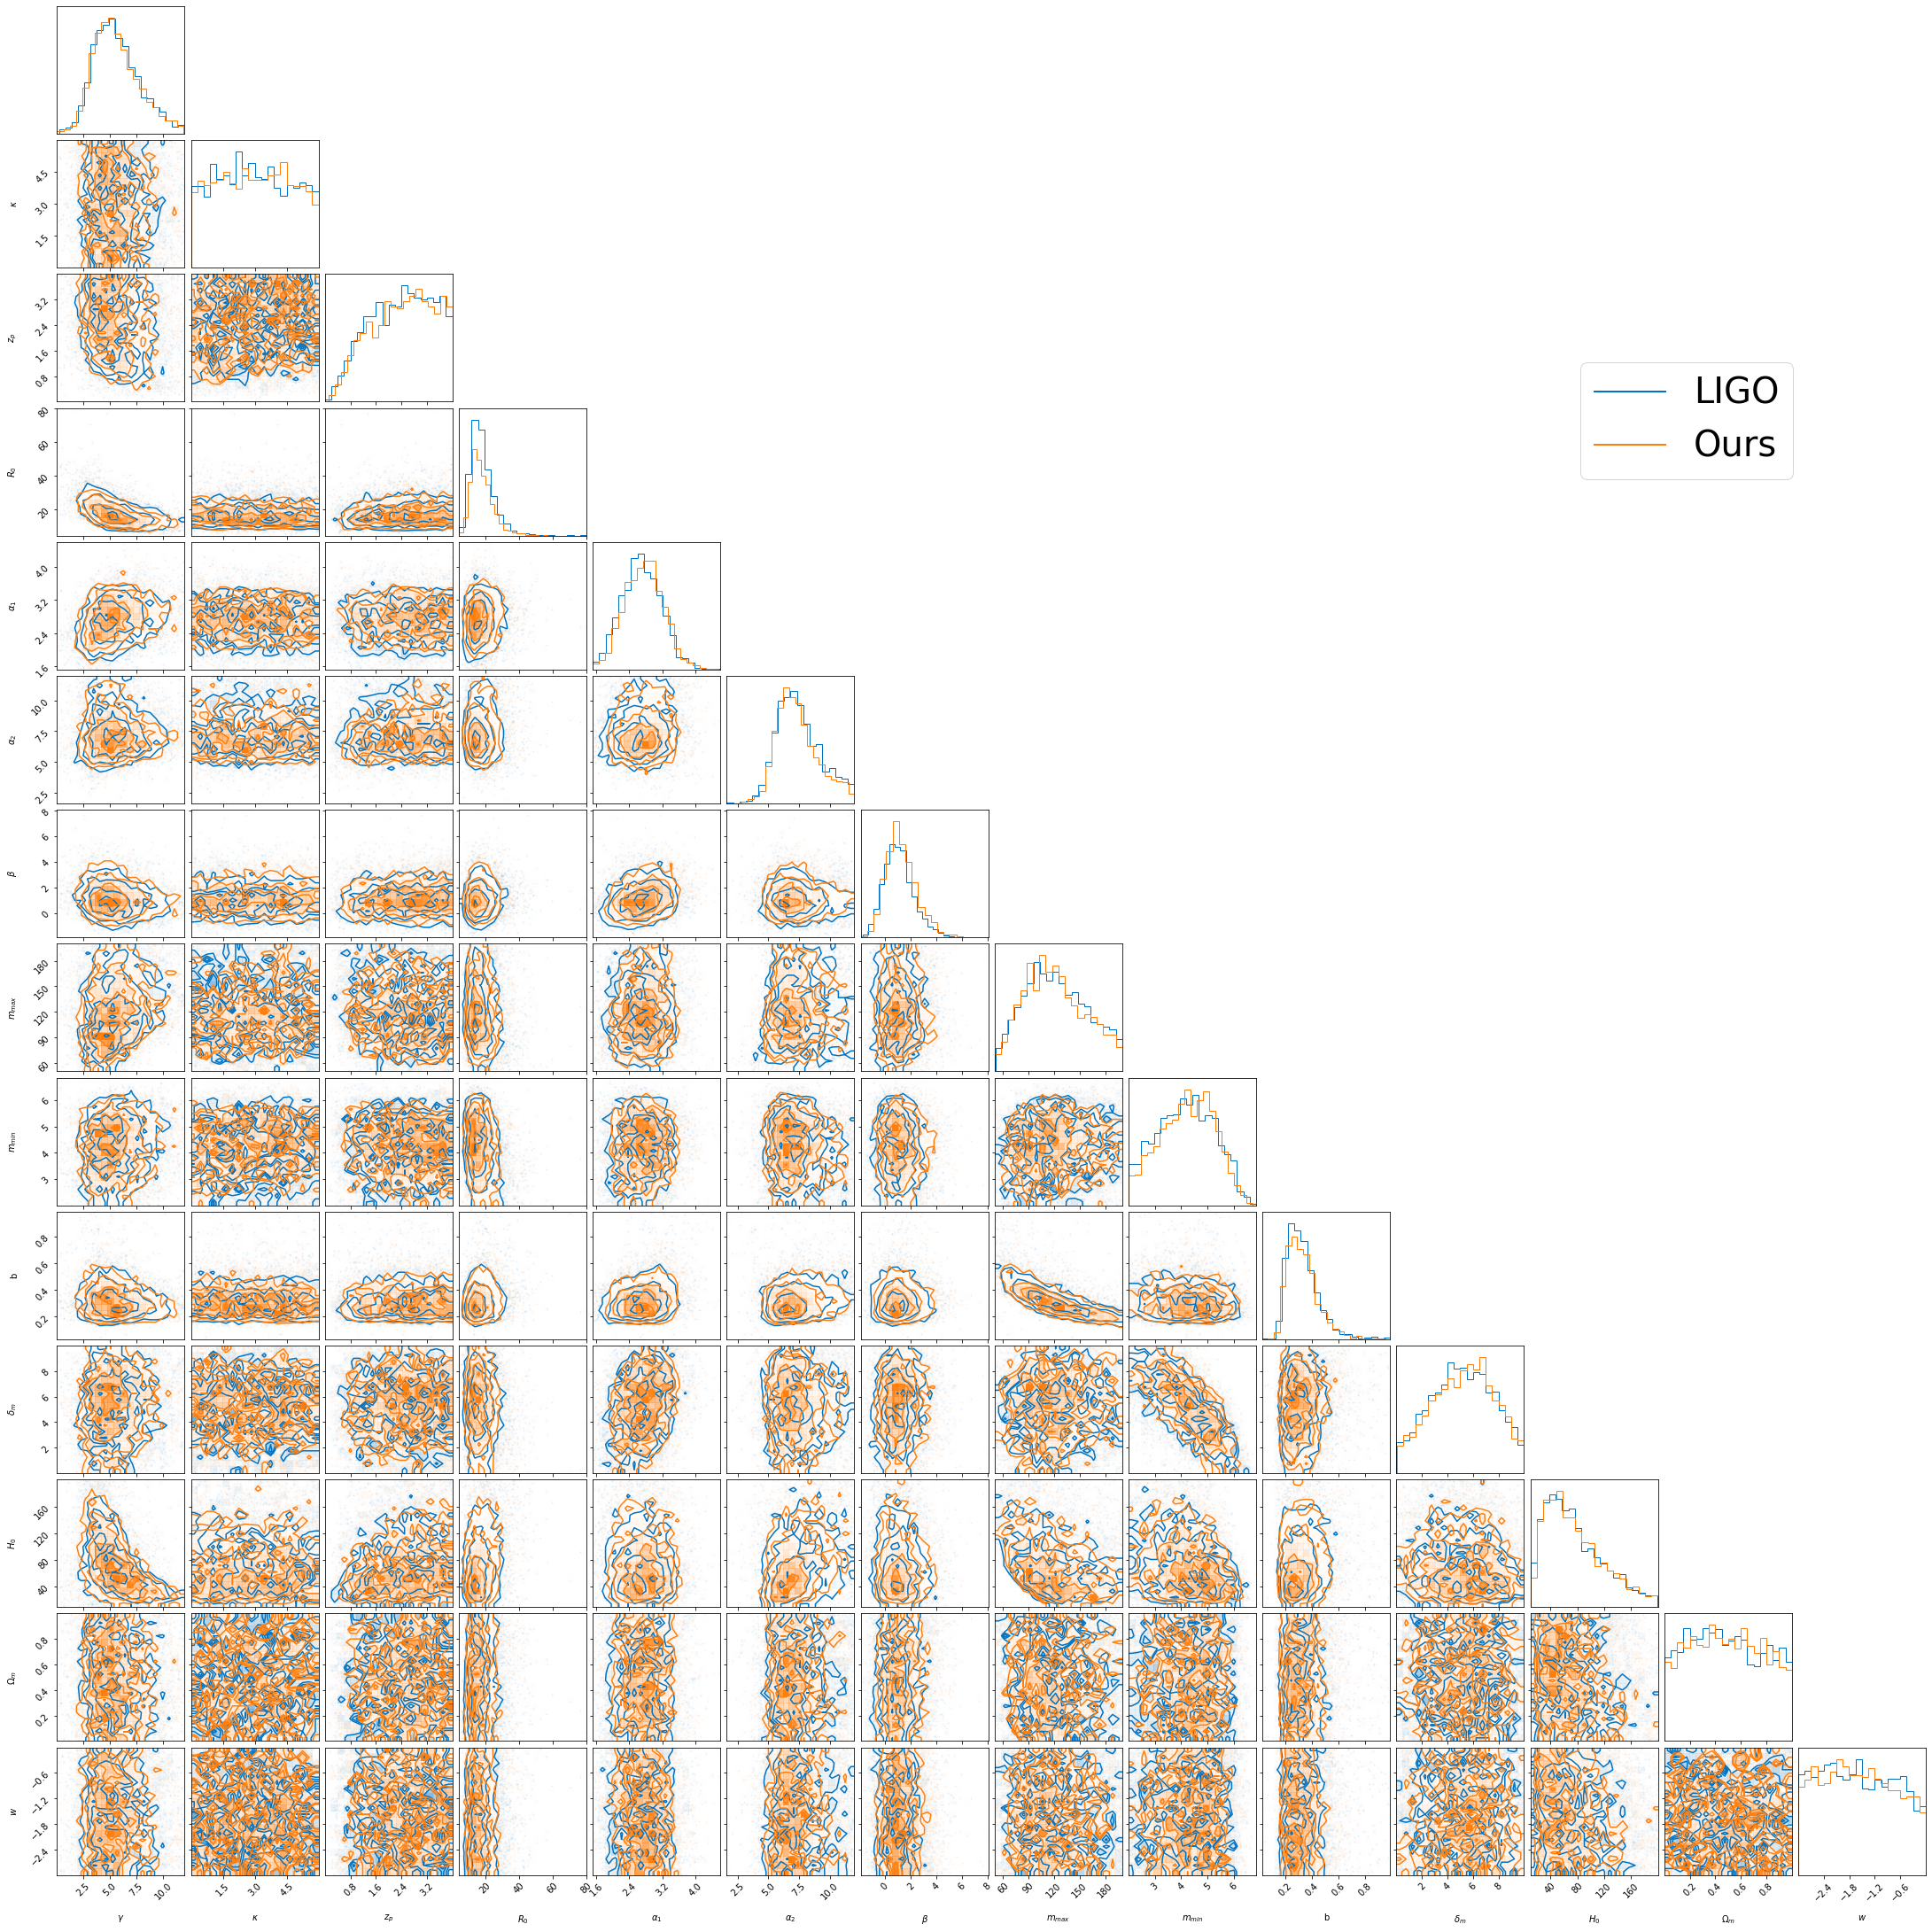

In [115]:
fig = corner.corner(ligo_result[::4], color='#0072C1', labels=labels)
corner.corner(our_result, fig=fig, color='#FF7F0E')
blue_line = mlines.Line2D([],[],color='#0072C1', lw=2, label="LIGO")
orange_line= mlines.Line2D([],[],color='#FF7F0E',lw=2, label="Ours")
plt.legend(handles=[blue_line, orange_line], bbox_to_anchor=(0.1, 12), loc='upper right', fontsize=40)
plt.savefig("broken_powerlaw.png")
plt.show()